In [7]:
import pandas as pd


data = {
    "Date": ["2023-01-01", "2023-01-02", "2023-01-03", "2023-01-04", "2023-01-05"],
    "Stock_Name": ["ABC Ltd", "ABC Ltd", "ABC Ltd", "ABC Ltd", "ABC Ltd"],
    "Open_Price": [100, 102, 104, 103, 105],
    "Close_Price": [102, 104, 103, 105, 107],
    "High": [103, 105, 106, 106, 108],
    "Low": [99, 100, 102, 102, 104],
    "Volume": [5000, 5500, 5200, 5300, 6000]
}

df = pd.DataFrame(data)


df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)


print(df, "\n")


df["Daily_%_Change"] = df["Close_Price"].pct_change() * 100
print(df[["Close_Price", "Daily_%_Change"]], "\n")


df["7D_MA_Close"] = df["Close_Price"].rolling(window=7).mean()
print(df[["Close_Price", "7D_MA_Close"]], "\n")


date_range_df = df.loc["2023-01-01":"2023-03-31"]
print(date_range_df, "\n")


max_vol_day = df["Volume"].idxmax()
max_vol_value = df.loc[max_vol_day, "Volume"]
print(f"---- Highest Volume ----\nDate: {max_vol_day.date()}, Volume: {max_vol_value}")


           Stock_Name  Open_Price  Close_Price  High  Low  Volume
Date                                                             
2023-01-01    ABC Ltd         100          102   103   99    5000
2023-01-02    ABC Ltd         102          104   105  100    5500
2023-01-03    ABC Ltd         104          103   106  102    5200
2023-01-04    ABC Ltd         103          105   106  102    5300
2023-01-05    ABC Ltd         105          107   108  104    6000 

            Close_Price  Daily_%_Change
Date                                   
2023-01-01          102             NaN
2023-01-02          104        1.960784
2023-01-03          103       -0.961538
2023-01-04          105        1.941748
2023-01-05          107        1.904762 

            Close_Price  7D_MA_Close
Date                                
2023-01-01          102          NaN
2023-01-02          104          NaN
2023-01-03          103          NaN
2023-01-04          105          NaN
2023-01-05          107         

In [8]:
import pandas as pd


data = {
    "Transaction_ID": [101, 102, 103, 104, 105, 106, 107, 108],
    "Customer_Name": ["Alice", "Bob", "Charlie", "Alice", "David", "Eve", "Charlie", "Bob"],
    "Product": ["Laptop", "Headphones", "Mouse", "Keyboard", "Monitor", "Laptop", "Mouse", "Monitor"],
    "Category": ["Electronics", "Electronics", "Accessories", "Accessories", "Electronics", "Electronics", "Accessories", "Electronics"],
    "Price": [800, 150, 25, 100, 300, 750, 25, 350],
    "Quantity": [1, 2, 3, 1, 1, 1, 4, 2],
    "Payment_Method": ["Card", "Cash", "UPI", "Card", "UPI", "Cash", "Card", "UPI"]
}

df = pd.DataFrame(data)


print(df, "\n")


payment_counts = df["Payment_Method"].value_counts()
print(payment_counts, "\n")


df["Total_Amount"] = df["Price"] * df["Quantity"]
high_value = df[df["Total_Amount"] > 500]
print(high_value, "\n")


most_frequent_product = df["Product"].mode()[0]
print(most_frequent_product, "\n")


revenue_per_category = df.groupby("Category")["Total_Amount"].sum()
print(revenue_per_category, "\n")


customer_spending = df.groupby("Customer_Name")["Total_Amount"].sum().sort_values(ascending=False)
top5_customers = customer_spending.head(5)
print(top5_customers)


   Transaction_ID Customer_Name     Product     Category  Price  Quantity  \
0             101         Alice      Laptop  Electronics    800         1   
1             102           Bob  Headphones  Electronics    150         2   
2             103       Charlie       Mouse  Accessories     25         3   
3             104         Alice    Keyboard  Accessories    100         1   
4             105         David     Monitor  Electronics    300         1   
5             106           Eve      Laptop  Electronics    750         1   
6             107       Charlie       Mouse  Accessories     25         4   
7             108           Bob     Monitor  Electronics    350         2   

  Payment_Method  
0           Card  
1           Cash  
2            UPI  
3           Card  
4            UPI  
5           Cash  
6           Card  
7            UPI   

Payment_Method
Card    3
UPI     3
Cash    2
Name: count, dtype: int64 

   Transaction_ID Customer_Name  Product     Category  Price

---- Customer Data ----
   Customer_ID  Age  Annual_Income  Spending_Score  Number_of_Transactions
0            1   22          30000              65                      15
1            2   25          40000              80                      25
2            3   31          35000              60                      20
3            4   35          45000              75                      18
4            5   40          60000              50                      30
5            6   28          38000              72                      24
6            7   45          70000              40                      12
7            8   50          80000              30                      10
8            9   23          32000              85                      28
9           10   38          50000              55                      22


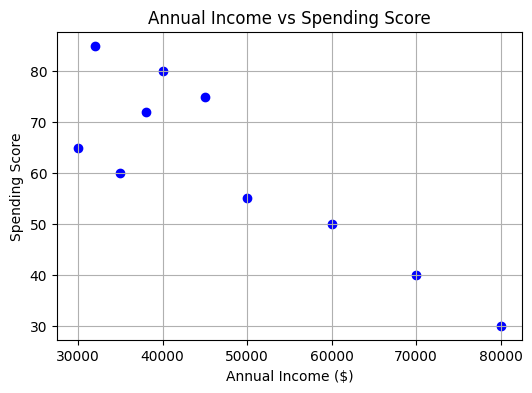

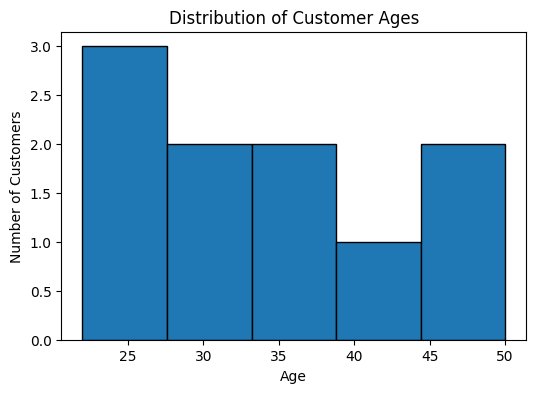

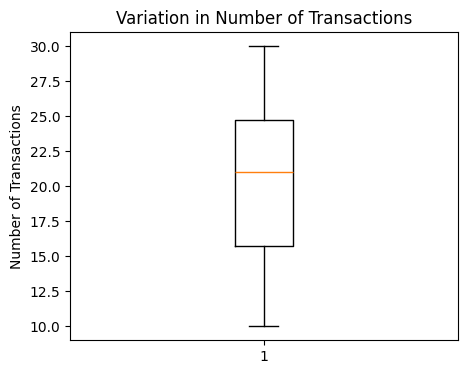

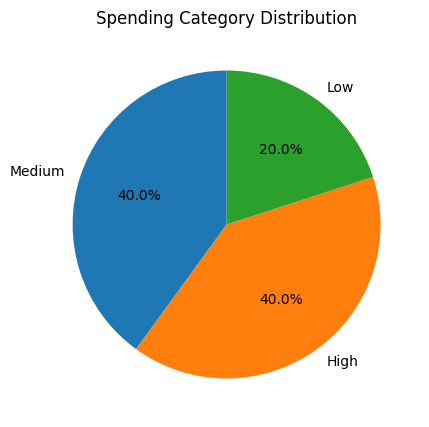

/tmp/ipython-input-3230215548.py:63: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby("Age_Group")["Spending_Score"].mean().dropna()


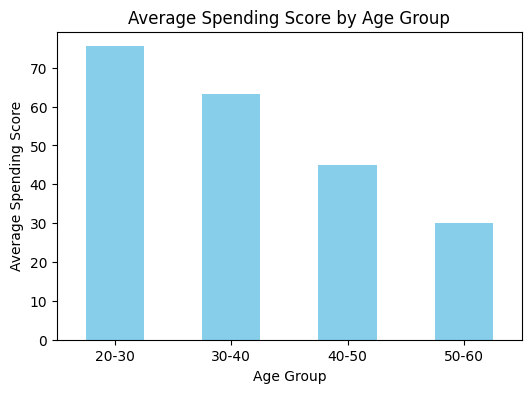

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Customer_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [22, 25, 31, 35, 40, 28, 45, 50, 23, 38],
    "Annual_Income": [30000, 40000, 35000, 45000, 60000, 38000, 70000, 80000, 32000, 50000],
    "Spending_Score": [65, 80, 60, 75, 50, 72, 40, 30, 85, 55],
    "Number_of_Transactions": [15, 25, 20, 18, 30, 24, 12, 10, 28, 22]
}

df = pd.DataFrame(data)
print("---- Customer Data ----")
print(df)

plt.figure(figsize=(6,4))
plt.scatter(df["Annual_Income"], df["Spending_Score"], color='blue', marker='o')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score")
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.hist(df["Age"], bins=5, edgecolor="black")
plt.title("Distribution of Customer Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()


plt.figure(figsize=(5,4))
plt.boxplot(df["Number_of_Transactions"])
plt.title("Variation in Number of Transactions")
plt.ylabel("Number of Transactions")
plt.show()


def spending_category(score):
    if score >= 70:
        return "High"
    elif score >= 50:
        return "Medium"
    else:
        return "Low"

df["Spending_Category"] = df["Spending_Score"].apply(spending_category)

category_counts = df["Spending_Category"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Spending Category Distribution")
plt.show()


bins = [20, 30, 40, 50, 60]
labels = ["20-30", "30-40", "40-50", "50-60"]

df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_group_spending = df.groupby("Age_Group")["Spending_Score"].mean().dropna()

plt.figure(figsize=(6,4))
age_group_spending.plot(kind="bar", color="skyblue")
plt.title("Average Spending Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spending Score")
plt.xticks(rotation=0)
plt.show()